# AIS

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df_agroFood = pd.read_csv('Agrofood_co2_emission.csv', encoding='latin1')
df_co2Deforest = pd.read_csv('co2-deforestation-for-food.csv', encoding='latin1')
df_foodProduc = pd.read_csv('Food_Production.csv', encoding='latin1')
df_foodEmissions = pd.read_csv('food-emissions-supply-chain.csv', encoding='latin1')
df_ghg = pd.read_csv('ghg-per-kg-poore.csv', encoding='latin1')
df_foodLoss = pd.read_csv('global-food-loss-index.csv', encoding='latin1')
df_globalFood = pd.read_csv('global-food.csv', encoding='latin1')
df_globalFood2 = pd.read_csv('global-food(1).csv', encoding='latin1')
df_waterWithdrawals = pd.read_csv('water-withdrawals-per-kg-poore.csv', encoding='latin1')
df_continents = pd.read_csv('continents2.csv', encoding='latin1')

In [63]:
df_agroFood

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature Â°C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,0.0000,79.0851,109.6446,14.2666,67.631366,691.7888,252.21419,11.997000,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,0.0000,80.4885,116.6789,11.4182,67.631366,710.8212,252.21419,12.853900,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,0.0000,80.7692,126.1721,9.2752,67.631366,743.6751,252.21419,13.492900,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,0.0000,85.0678,81.4607,9.0635,67.631366,791.9246,252.21419,14.055900,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,0.0000,88.8058,90.4008,8.3962,67.631366,831.9181,252.21419,15.126900,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.910800,1077.2392,317.07440,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.985700,1093.3441,332.77590,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.057000,1108.5523,348.51070,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.951400,1121.3255,327.82090,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [64]:
df_agroFood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

<Axes: >

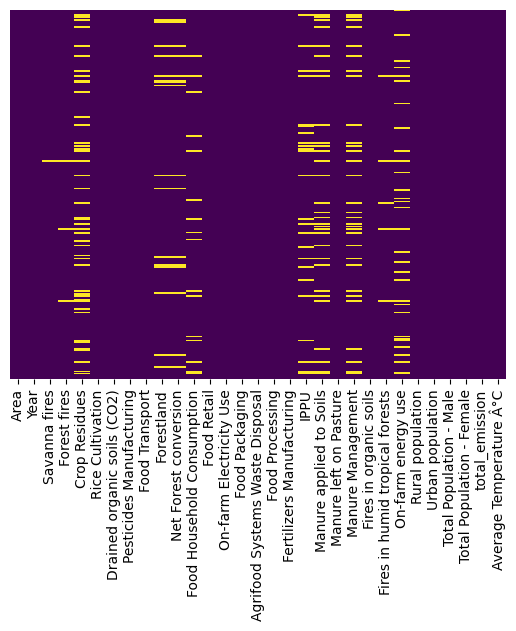

In [65]:
sns.heatmap(df_agroFood.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [66]:
# Remover dados de anos inferiores a 2010
df_agroFood = df_agroFood[df_agroFood['Year'] >= 2010]
df_agroFood

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature Â°C
20,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.610850,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.529250
21,Afghanistan,2011,1.8412,0.0000,335.0379,823.2000,0.0,81.610850,478.8137,-246.2191,0.0000,522.6275,270.6066,50.4527,339.833670,2610.1325,1299.824095,32.492700,192.3717,449.4714,2840.2660,843.1709,0.0,0.0,NaN,22594126.0,7114473.0,14780282.0,14468875.0,10925.534316,1.254583
22,Afghanistan,2012,2.8955,0.0000,445.5958,803.6000,0.0,107.386444,530.8213,-246.2191,0.0000,534.4065,271.2397,47.1675,339.833670,2743.2372,1326.917597,29.443300,266.4513,441.8546,2798.7363,836.9089,0.0,0.0,NaN,23280663.0,7416295.0,15399105.0,15067373.0,11280.276511,0.344167
23,Afghanistan,2013,3.1595,0.0000,455.0727,803.6000,0.0,76.061874,391.0777,-246.2191,0.0000,833.2319,276.2396,66.6996,353.930640,2870.4764,1441.160481,29.981400,333.5334,432.0026,2741.0994,832.8961,0.0,0.0,NaN,23997856.0,7733832.0,15946572.0,15594637.0,11694.004195,1.290917
24,Afghanistan,2014,2.6796,0.0000,473.4174,862.4000,0.0,49.782873,304.1804,-246.2191,0.0000,1094.1338,333.4255,78.6716,353.930640,2976.2524,1484.197070,28.639400,282.6155,437.6203,2770.4672,842.5037,0.0,0.0,NaN,24703798.0,8054222.0,16543889.0,16172321.0,12128.698284,0.468667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.910800,1077.2392,317.074400,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.985700,1093.3441,332.775900,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.057000,1108.5523,348.510700,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.951400,1121.3255,327.820900,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [48]:
df_co2Deforest

,Entity,Code,Year,total_embodied_emissions
0,Australia,AUS,2013,1.219255e+07
1,Austria,AUT,2013,3.021984e+06
2,Belgium,BEL,2013,1.082760e+07
3,Brazil,BRA,2013,5.447281e+08
4,Bulgaria,BGR,2013,6.481203e+05
5,Canada,CAN,2013,1.282691e+07
6,China,CHN,2013,1.931663e+08
7,Croatia,HRV,2013,5.138495e+05
8,Cyprus,CYP,2013,2.646826e+05
9,Czechia,CZE,2013,2.079429e+06


In [49]:
df_co2Deforest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entity                    44 non-null     object 
 1   Code                      44 non-null     object 
 2   Year                      44 non-null     int64  
 3   total_embodied_emissions  44 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ KB


In [50]:
df_foodProduc

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPOâeq per 1000kcal),Eutrophying emissions per kilogram (gPOâeq per kilogram),Eutrophying emissions per 100g protein (gPOâeq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCOâeq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCOâeq per 100g protein),Land use per 1000kcal (mÂ² per 1000kcal),Land use per kilogram (mÂ² per kilogram),Land use per 100g protein (mÂ² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,11.23,8.638462,183.911552,371.076923,482.4,0.945482,1.907692,2.897446,7.60,5.846154,18786.2,14450.923080,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,35.07,49.394366,609.983722,3166.760563,2248.4,1.207271,6.267606,0.759631,2.80,3.943662,49576.3,69825.774650,13449.891480
5,Potatoes,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.754098,3.48,20.470588,80.737705,347.647059,59.1,0.628415,2.705882,1.202186,0.88,5.176471,2754.2,16201.176470,3762.568306
6,Cassava,0.6,0.0,0.2,0.0,0.1,0.0,0.0,0.9,0.708419,0.69,7.666667,NaN,NaN,0.0,1.355236,14.666667,1.858316,1.81,20.111111,0.0,NaN,NaN
7,Cane Sugar,1.2,0.0,0.5,0.0,0.8,0.1,0.0,2.6,4.820513,16.92,NaN,176.666667,NaN,620.1,0.911681,NaN,0.581197,2.04,NaN,16438.6,NaN,4683.361823
8,Beet Sugar,0.0,0.0,0.5,0.2,0.6,0.1,0.0,1.4,1.541311,5.41,NaN,62.022792,NaN,217.7,0.515670,NaN,0.521368,1.83,NaN,9493.3,NaN,2704.643875
9,Other Pulses,0.0,0.0,1.1,0.0,0.1,0.4,0.0,1.6,5.008798,17.08,7.977581,NaN,203.503036,435.7,0.524927,0.836058,4.565982,15.57,7.272303,22477.4,10498.552080,NaN


In [52]:
df_foodProduc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [53]:
df_foodEmissions

,Entity,Code,Year,food_emissions_land_use,food_emissions_farm,food_emissions_animal_feed,food_emissions_processing,food_emissions_transport,food_emissions_retail,food_emissions_packaging,food_emissions_losses
0,Apples,NaN,2018,-0.028951,0.225816,0.000000,0.003820,0.095804,0.016578,0.044526,0.070808
1,Bananas,NaN,2018,-0.025534,0.269618,0.000000,0.060146,0.295830,0.020981,0.065670,0.175185
2,Barley,NaN,2018,0.008676,0.176377,0.000000,0.127703,0.035351,0.263587,0.496786,0.070692
3,Beef (beef herd),NaN,2018,23.237536,56.228063,2.680979,1.811083,0.494125,0.233538,0.352084,14.439998
4,Beef (dairy herd),NaN,2018,1.266022,21.915529,3.503673,1.547664,0.592410,0.254032,0.374549,3.847515
5,Beet Sugar,NaN,2018,0.000052,0.535721,0.000000,0.241885,0.628544,0.039322,0.090289,0.276263
6,Berries & Grapes,NaN,2018,0.024601,0.717848,0.000000,0.000000,0.236392,0.017057,0.211092,0.324895
7,Brassicas,NaN,2018,0.002242,0.277745,0.000000,0.000000,0.094641,0.016844,0.045303,0.077781
8,Cane Sugar,NaN,2018,1.263041,0.491270,0.000000,0.037381,0.794510,0.036723,0.084277,0.491722
9,Cassava,NaN,2018,0.589436,0.219994,0.000000,0.000000,0.093597,0.039322,0.044822,0.328504


In [54]:
df_ghg

,Entity,Code,Year,"GHG emissions per kilogram (Poore & Nemecek, 2018)"
0,Apples,NaN,2010,0.43
1,Bananas,NaN,2010,0.86
2,Barley,NaN,2010,1.18
3,Beef (beef herd),NaN,2010,99.48
4,Beef (dairy herd),NaN,2010,33.30
5,Beet Sugar,NaN,2010,1.81
6,Berries & Grapes,NaN,2010,1.53
7,Brassicas,NaN,2010,0.51
8,Cane Sugar,NaN,2010,3.20
9,Cassava,NaN,2010,1.32


In [67]:
df_foodLoss

,Entity,Code,Year,12.3.1 - Global food loss index - AG_FLS_INDEX
0,Central and Southern Asia (UN),NaN,2016,96.76
1,Central and Southern Asia (UN),NaN,2020,94.91
2,Central and Southern Asia (UN),NaN,2021,88.70
3,Eastern and South-Eastern Asia (UN),NaN,2016,99.06
4,Eastern and South-Eastern Asia (UN),NaN,2020,99.48
5,Eastern and South-Eastern Asia (UN),NaN,2021,99.97
6,Europe and Northern America (UN),NaN,2016,99.49
7,Europe and Northern America (UN),NaN,2020,106.53
8,Europe and Northern America (UN),NaN,2021,100.94
9,Latin America and the Caribbean (UN),NaN,2016,99.84


In [73]:
df_foodLoss.rename({'Northen Africa (UN)': 'Northen Africa'}, inplace=True)
df_foodLoss

,Entity,Code,Year,12.3.1 - Global food loss index - AG_FLS_INDEX
0,Central and Southern Asia (UN),NaN,2016,96.76
1,Central and Southern Asia (UN),NaN,2020,94.91
2,Central and Southern Asia (UN),NaN,2021,88.70
3,Eastern and South-Eastern Asia (UN),NaN,2016,99.06
4,Eastern and South-Eastern Asia (UN),NaN,2020,99.48
5,Eastern and South-Eastern Asia (UN),NaN,2021,99.97
6,Europe and Northern America (UN),NaN,2016,99.49
7,Europe and Northern America (UN),NaN,2020,106.53
8,Europe and Northern America (UN),NaN,2021,100.94
9,Latin America and the Caribbean (UN),NaN,2016,99.84


### *Tratar do dataset de global food*

In [57]:
df_globalFood

,Product,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),area_harvested__ha__per_capita,Land Use per capita (mÂ²),Producing or slaughtered animals,Producing or slaughtered animals per capita,Imports (t),imports__tonnes__per_capita,Imports per capita (kg),Exports (t),exports__tonnes__per_capita,Exports per capita (kg),Domestic supply (t),domestic_supply__tonnes__per_capita,Domestic supply per capita (kg),Food (t),food__tonnes__per_capita,Food per capita (kg),Animal feed (t),feed__tonnes__per_capita,Animal feed per capita (kg),Other uses (t),other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
0,NaN,Afghanistan,1961,8790140.0,700000.0,0.079635,79.634680,1.4000,NaN,500000.0,0.056882,568.81916,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,700000.0,0.079635,79.634680,403000.0,0.045847,45.846824,210000.0,0.023890,23.890404,NaN,NaN,NaN,70000.0,0.007963,7.963468,45.787930,125.446382,387.08370,10.237346,5.439545
1,NaN,Afghanistan,1962,8969055.0,700000.0,0.078046,78.046130,1.4000,NaN,500000.0,0.055747,557.47233,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,700000.0,0.078046,78.046130,403000.0,0.044932,44.932270,210000.0,0.023414,23.413839,NaN,NaN,NaN,70000.0,0.007805,7.804613,44.879000,122.956163,379.35650,10.029739,5.330847
2,NaN,Afghanistan,1963,9157463.0,713000.0,0.077860,77.859990,1.4260,NaN,500000.0,0.054600,546.00276,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,713000.0,0.077860,77.859990,410000.0,0.044772,44.772226,214000.0,0.023369,23.368917,NaN,NaN,NaN,71000.0,0.007753,7.753239,44.785263,122.699349,378.59918,10.015743,5.324051
3,NaN,Afghanistan,1964,9355510.0,720000.0,0.076960,76.960000,1.4257,NaN,505000.0,0.053979,539.78886,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,720000.0,0.076960,76.960000,415000.0,0.044359,44.358887,216000.0,0.023088,23.087999,NaN,NaN,NaN,72000.0,0.007696,7.696000,44.308723,121.393760,374.53220,9.908746,5.265616
4,NaN,Afghanistan,1965,9565154.0,720000.0,0.075273,75.273220,1.4400,NaN,500000.0,0.052273,522.73072,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,720000.0,0.075273,75.273220,415000.0,0.043387,43.386650,216000.0,0.022582,22.581968,NaN,NaN,NaN,72000.0,0.007527,7.527323,43.336914,118.731270,366.32706,9.688275,5.145301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13396,NaN,Zimbabwe,2017,14751101.0,1532572.0,0.103895,103.895430,1.3933,NaN,1099945.0,0.074567,745.66975,NaN,NaN,335000.0,0.022710,22.710169,2000.0,0.000136,0.135583,1632000.0,0.110636,110.635810,1300000.0,0.088129,88.129014,222000.0,0.015050,15.049724,NaN,NaN,NaN,70000.0,0.004745,4.745408,88.105850,241.385888,698.69900,18.404848,7.518289
13397,NaN,Zimbabwe,2018,15052191.0,1560100.0,0.103646,103.646040,1.3506,NaN,1155075.0,0.076738,767.38000,NaN,NaN,100000.0,0.006644,6.643551,1000.0,0.000066,0.066436,1605000.0,0.106629,106.628990,1300000.0,0.086366,86.366160,192000.0,0.012756,12.755618,NaN,NaN,NaN,71000.0,0.004717,4.716921,86.351590,236.579696,684.82710,18.043474,7.376625
13398,NaN,Zimbabwe,2019,15354606.0,773976.0,0.050407,50.406765,0.7807,NaN,991354.0,0.064564,645.63950,NaN,NaN,77000.0,0.005015,5.014782,1000.0,0.000065,0.065127,1044000.0,0.067993,67.992630,995000.0,0.064801,64.801400,92000.0,0.005992,5.991687,NaN,NaN,NaN,27000.0,0.001758,1.758430,64.802260,177.540437,564.02010,14.860454,6.075808
13399,NaN,Zimbabwe,2020,15669663.0,1202347.0,0.076731,76.730880,1.1801,NaN,1018884.0,0.065023,650.22714,NaN,NaN,1048000.0,0.066881,66.880820,5000.0,0.000319,0.319088,1449000.0,0.092472,92.471674,1147000.0,0.073199,7

In [69]:
df_globalFood = df_globalFood[df_globalFood['Year'] >= 2010]
df_globalFood

,Product,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),area_harvested__ha__per_capita,Land Use per capita (mÂ²),Producing or slaughtered animals,Producing or slaughtered animals per capita,Imports (t),imports__tonnes__per_capita,Imports per capita (kg),Exports (t),exports__tonnes__per_capita,Exports per capita (kg),Domestic supply (t),domestic_supply__tonnes__per_capita,Domestic supply per capita (kg),Food (t),food__tonnes__per_capita,Food per capita (kg),Animal feed (t),feed__tonnes__per_capita,Animal feed per capita (kg),Other uses (t),other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
49,NaN,Afghanistan,2010,28189672.0,301000.0,0.010678,10.677669,1.6448,NaN,183000.0,0.006492,64.917393,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,301000.0,0.010678,10.677669,54000.0,0.001916,1.915595,178000.0,0.006314,6.314369,NaN,NaN,NaN,45000.0,0.001596,1.596329,1.905032,5.219267,16.099596,0.424491,0.227776
50,NaN,Afghanistan,2011,29249156.0,300120.0,0.010261,10.260809,1.6400,NaN,183000.0,0.006257,62.565906,NaN,NaN,3000.0,0.000103,0.102567,0.0,0.000000,0.000000,303000.0,0.010359,10.359273,56000.0,0.001915,1.914585,191000.0,0.006530,6.530103,NaN,NaN,NaN,45000.0,0.001539,1.538506,1.925484,5.275299,16.309984,0.432462,0.226528
51,NaN,Afghanistan,2012,30466484.0,310000.0,0.010175,10.175115,2.1986,NaN,141000.0,0.004628,46.280366,NaN,NaN,4000.0,0.000131,0.131292,0.0,0.000000,0.000000,314000.0,0.010306,10.306408,56000.0,0.001838,1.838086,200000.0,0.006565,6.564591,NaN,NaN,NaN,47000.0,0.001543,1.542679,1.830805,5.015904,15.464677,0.409118,0.214787
52,NaN,Afghanistan,2013,31541216.0,312000.0,0.009892,9.891819,2.1972,NaN,142000.0,0.004502,45.020460,NaN,NaN,1000.0,0.000032,0.031705,0.0,0.000000,0.000000,313000.0,0.009924,9.923523,54000.0,0.001712,1.712046,200000.0,0.006341,6.340910,NaN,NaN,NaN,47000.0,0.001490,1.490114,1.698356,4.653029,14.364405,0.378549,0.204621
53,NaN,Afghanistan,2014,32716214.0,316000.0,0.009659,9.658819,2.4882,NaN,127000.0,0.003882,38.818673,NaN,NaN,57000.0,0.001742,1.742255,2000.0,0.000061,0.061132,370000.0,0.011309,11.309377,89000.0,0.002720,2.720364,200000.0,0.006113,6.113177,7000.0,0.000214,0.213961,47000.0,0.001437,1.436597,2.713237,7.433527,22.919716,0.601808,0.326404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13396,NaN,Zimbabwe,2017,14751101.0,1532572.0,0.103895,103.895430,1.3933,NaN,1099945.0,0.074567,745.669750,NaN,NaN,335000.0,0.022710,22.710169,2000.0,0.000136,0.135583,1632000.0,0.110636,110.635810,1300000.0,0.088129,88.129014,222000.0,0.015050,15.049724,NaN,NaN,NaN,70000.0,0.004745,4.745408,88.105850,241.385888,698.699000,18.404848,7.518289
13397,NaN,Zimbabwe,2018,15052191.0,1560100.0,0.103646,103.646040,1.3506,NaN,1155075.0,0.076738,767.380000,NaN,NaN,100000.0,0.006644,6.643551,1000.0,0.000066,0.066436,1605000.0,0.106629,106.628990,1300000.0,0.086366,86.366160,192000.0,0.012756,12.755618,NaN,NaN,NaN,71000.0,0.004717,4.716921,86.351590,236.579696,684.827100,18.043474,7.376625
13398,NaN,Zimbabwe,2019,15354606.0,773976.0,0.050407,50.406765,0.7807,NaN,991354.0,0.064564,645.639500,NaN,NaN,77000.0,0.005015,5.014782,1000.0,0.000065,0.065127,1044000.0,0.067993,67.992630,995000.0,0.064801,64.801400,92000.0,0.005992,5.991687,NaN,NaN,NaN,27000.0,0.001758,1.758430,64.802260,177.540437,564.020100,14.860454,6.075808
13399,NaN,Zimbabwe,2020,15669663.0,1202347.0,0.076731,76.730880,1.1801,NaN,1018884.0,0.065023,650.227140,NaN,NaN,1048000.0,0.066881,66.880820,5000.0,0.000319,0.319088,1449000.0,0.092472,92.471674,1147000.0,

In [58]:
df_globalFood2

,Product,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),area_harvested__ha__per_capita,Land Use per capita (mÂ²),Producing or slaughtered animals,Producing or slaughtered animals per capita,Imports (t),imports__tonnes__per_capita,Imports per capita (kg),Exports (t),exports__tonnes__per_capita,Exports per capita (kg),Domestic supply (t),domestic_supply__tonnes__per_capita,Domestic supply per capita (kg),Food (t),food__tonnes__per_capita,Food per capita (kg),Animal feed (t),feed__tonnes__per_capita,Animal feed per capita (kg),Other uses (t),other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
0,NaN,Afghanistan,1961,8790140.0,291300.00,0.033139,33.139404,4.2402,NaN,68700.0,0.007816,78.155750,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,370000.0,0.042093,42.092618,329000.0,0.037428,37.428300,NaN,NaN,NaN,NaN,NaN,NaN,41000.0,0.004664,4.664317,37.435070,102.561835,22.410109,1.201997,0.183355
1,NaN,Afghanistan,1962,8969055.0,306300.00,0.034151,34.150753,4.4585,NaN,68700.0,0.007660,76.596700,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,385000.0,0.042925,42.925370,343000.0,0.038243,38.242600,NaN,NaN,NaN,NaN,NaN,NaN,42000.0,0.004683,4.682768,38.192513,104.637021,22.424213,1.233332,0.193664
2,NaN,Afghanistan,1963,9157463.0,324600.00,0.035446,35.446500,4.7249,NaN,68700.0,0.007502,75.020776,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,408000.0,0.044554,44.553824,363000.0,0.039640,39.639800,NaN,NaN,NaN,NaN,NaN,NaN,45000.0,0.004914,4.914025,39.644800,108.615889,23.458462,1.285116,0.193787
3,NaN,Afghanistan,1964,9355510.0,342900.00,0.036652,36.652196,4.6526,NaN,73700.0,0.007878,78.777100,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,431000.0,0.046069,46.069108,383000.0,0.040938,40.938440,NaN,NaN,NaN,NaN,NaN,NaN,48000.0,0.005131,5.130666,40.992203,112.307404,24.491236,1.326609,0.204094
4,NaN,Afghanistan,1965,9565154.0,357500.00,0.037375,37.375250,4.4856,NaN,79700.0,0.008332,83.323280,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,448000.0,0.046837,46.836674,399000.0,0.041714,41.713912,NaN,NaN,NaN,NaN,NaN,NaN,49000.0,0.005123,5.122761,41.683067,114.200182,24.501434,1.347579,0.204179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14057,NaN,Zimbabwe,2017,14751101.0,232628.50,0.015770,15.770247,6.7140,NaN,34648.0,0.002349,23.488416,NaN,NaN,6000.0,0.000407,0.406749,2000.0,0.000136,0.135583,238000.0,0.016134,16.134389,220000.0,0.014914,14.914141,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,0.001356,1.355831,14.882158,40.773035,9.651205,0.569421,0.086861
14058,NaN,Zimbabwe,2018,15052191.0,236034.77,0.015681,15.681090,6.6013,NaN,35756.0,0.002375,23.754681,NaN,NaN,3000.0,0.000199,0.199307,5000.0,0.000332,0.332178,236000.0,0.015679,15.678780,219000.0,0.014549,14.549376,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,0.001329,1.328710,14.570992,39.920526,9.592490,0.556364,0.086332
14059,NaN,Zimbabwe,2019,15354606.0,233508.66,0.015208,15.207727,6.6678,NaN,35020.0,0.002281,22.807490,NaN,NaN,1000.0,0.000065,0.065127,6000.0,0.000391,0.390762,224000.0,0.014588,14.588457,207000.0,0.013481,13.481297,NaN,NaN,NaN,NaN,NaN,NaN,19000.0,0.001237,1.237414,13.496497,36.976704,9.538160,0.524599,0.076305
14060,NaN,Zimbabwe,2020,15669663.0,234587.97,0.014971,14.970837,6.5932,NaN,35580.0,0.002271,22.706296,NaN,NaN,1000.0,0.000064,0.063818,6000.0,0.000383,0.382905,223000.0,0.014231,14.231321,207000.0,0.013210,13.210240,NaN,NaN,NaN,NaN,NaN,NaN,19000.0,0.001213,1.212534,13.212823,36.199515,9.485156,0.512198,0.075881


In [70]:
df_globalFood2 = df_globalFood2[df_globalFood2['Year'] >= 2010]
df_globalFood2

,Product,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),area_harvested__ha__per_capita,Land Use per capita (mÂ²),Producing or slaughtered animals,Producing or slaughtered animals per capita,Imports (t),imports__tonnes__per_capita,Imports per capita (kg),Exports (t),exports__tonnes__per_capita,Exports per capita (kg),Domestic supply (t),domestic_supply__tonnes__per_capita,Domestic supply per capita (kg),Food (t),food__tonnes__per_capita,Food per capita (kg),Animal feed (t),feed__tonnes__per_capita,Animal feed per capita (kg),Other uses (t),other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
49,NaN,Afghanistan,2010,28189672.0,969763.10,0.034401,34.401360,10.670199,NaN,90885.0,0.003224,32.240532,NaN,NaN,10000.0,0.000355,0.354740,149000.0,0.005286,5.285624,1438000.0,0.051012,51.011592,1271000.0,0.045087,45.087434,NaN,NaN,NaN,NaN,NaN,NaN,167000.0,0.005924,5.924156,45.078865,123.503738,28.989624,1.190645,0.196715
50,NaN,Afghanistan,2011,29249156.0,762948.50,0.026084,26.084462,10.309299,NaN,74006.0,0.002530,25.301927,NaN,NaN,127000.0,0.004342,4.342006,73000.0,0.002496,2.495799,1274000.0,0.043557,43.556813,1146000.0,0.039181,39.180618,NaN,NaN,NaN,NaN,NaN,NaN,129000.0,0.004410,4.410384,39.178970,107.339643,24.712097,1.081154,0.175044
51,NaN,Afghanistan,2012,30466484.0,817743.50,0.026841,26.840758,10.229700,NaN,79938.0,0.002624,26.238014,NaN,NaN,97000.0,0.003184,3.183827,28000.0,0.000919,0.919043,1301000.0,0.042703,42.702664,1174000.0,0.038534,38.534150,NaN,NaN,NaN,NaN,NaN,NaN,127000.0,0.004169,4.168515,38.538956,105.586180,24.547106,1.104620,0.184103
52,NaN,Afghanistan,2013,31541216.0,790266.94,0.025055,25.055056,10.026000,NaN,78821.0,0.002499,24.989840,NaN,NaN,122000.0,0.003868,3.867955,37000.0,0.001173,1.173068,1231000.0,0.039028,39.028298,1117000.0,0.035414,35.413980,NaN,NaN,NaN,NaN,NaN,NaN,117000.0,0.003709,3.709432,35.419920,97.040876,22.508327,1.053799,0.173928
53,NaN,Afghanistan,2014,32716214.0,973721.60,0.029763,29.762663,9.740900,NaN,99962.0,0.003055,30.554270,NaN,NaN,323000.0,0.009873,9.872780,68000.0,0.002078,2.078480,1792000.0,0.054774,54.774065,1630000.0,0.049822,49.822390,NaN,NaN,NaN,NaN,NaN,NaN,167000.0,0.005105,5.104503,49.817490,136.486273,33.660465,1.560622,0.265204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14057,NaN,Zimbabwe,2017,14751101.0,232628.50,0.015770,15.770247,6.714000,NaN,34648.0,0.002349,23.488416,NaN,NaN,6000.0,0.000407,0.406749,2000.0,0.000136,0.135583,238000.0,0.016134,16.134389,220000.0,0.014914,14.914141,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,0.001356,1.355831,14.882158,40.773035,9.651205,0.569421,0.086861
14058,NaN,Zimbabwe,2018,15052191.0,236034.77,0.015681,15.681090,6.601300,NaN,35756.0,0.002375,23.754681,NaN,NaN,3000.0,0.000199,0.199307,5000.0,0.000332,0.332178,236000.0,0.015679,15.678780,219000.0,0.014549,14.549376,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,0.001329,1.328710,14.570992,39.920526,9.592490,0.556364,0.086332
14059,NaN,Zimbabwe,2019,15354606.0,233508.66,0.015208,15.207727,6.667800,NaN,35020.0,0.002281,22.807490,NaN,NaN,1000.0,0.000065,0.065127,6000.0,0.000391,0.390762,224000.0,0.014588,14.588457,207000.0,0.013481,13.481297,NaN,NaN,NaN,NaN,NaN,NaN,19000.0,0.001237,1.237414,13.496497,36.976704,9.538160,0.524599,0.076305
14060,NaN,Zimbabwe,2020,15669663.0,234587.97,0.014971,14.970837,6.593200,NaN,35580.0,0.002271,22.706296,NaN,NaN,1000.0,0.000064,0.063818,6000.0,0.000383,0.382905,223000.0,0.014231,14.231321,207000.0,0.013210,13.210240,NaN,NaN,NaN,NaN,NaN,NaN,19000.0,0.001213,1.212534,13.212823,36.199

In [59]:
df_waterWithdrawals

,Entity,Code,Year,"Freshwater withdrawals per kilogram (Poore & Nemecek, 2018)"
0,Apples,NaN,2010,180.1
1,Bananas,NaN,2010,114.5
2,Barley,NaN,2010,17.1
3,Beef (beef herd),NaN,2010,1451.2
4,Beef (dairy herd),NaN,2010,2714.3
5,Beet Sugar,NaN,2010,217.7
6,Berries & Grapes,NaN,2010,419.6
7,Brassicas,NaN,2010,119.4
8,Cane Sugar,NaN,2010,620.1
9,Cassava,NaN,2010,0.0


In [60]:
df_continents

,ï»¿name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Ã land Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


# Data Preperation

## Years and Countries